# Kaggle Housing Prices using Random Forest Regression

## with Parameter Tuning

### Galen Wilkerson

The Kaggle competition is here:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques


This is based on the tutorial:
https://www.youtube.com/watch?v=0GrciaGYzV0


In [416]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

%matplotlib notebook

In [417]:
X = pd.read_csv('data/train.csv')

X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [418]:
# take the final column - sale price - as the target variable we are trying to estimate
y = X.pop("SalePrice")

<IPython.core.display.Javascript object>


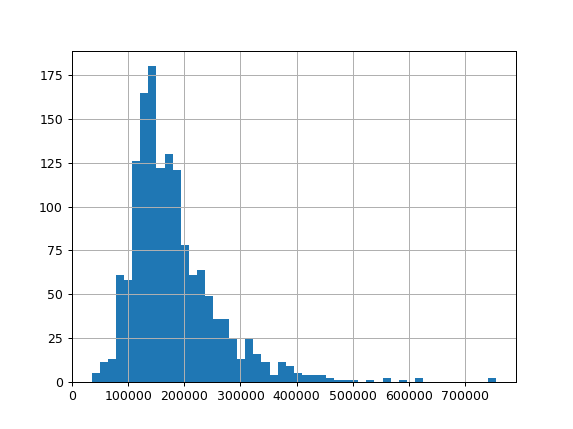

In [419]:
# take a quick look at the target sale price distrbution 
y.hist(bins = 50);

In [420]:
# look at numeric variables

X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [421]:
# Are there Nan values in each column?
X.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea 

# Baseline - Fit using only numeric columns

In [422]:
# list the numeric columns

numeric_variables = list(X.dtypes[X.dtypes != "object"].index)

numeric_variables

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [423]:
# any Nan values in numeric columns?

X[numeric_variables].isna().any()

Id               False
MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [424]:
# use mean values to fill in Nans

X.LotFrontage.fillna(X.LotFrontage.mean(), inplace=True)
X.MasVnrArea.fillna(X.MasVnrArea.mean(), inplace=True)
X.GarageYrBlt.fillna(X.GarageYrBlt.mean(), inplace=True)

X[numeric_variables].isna().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [425]:
# Note we can also sum Nans across rows and columns

X[numeric_variables].isna().sum().sum()

0

## Baseline fit of numeric values

In [426]:
model = RandomForestRegressor(n_estimators = 100, oob_score=True, random_state=42)

model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [427]:
# a measure of accuracy

model.oob_score_

0.85202610125134592

#### A nice explanation of Out-of-Bag Error is here:
https://stackoverflow.com/questions/18541923/what-is-out-of-bag-error-in-random-forests#_

Intuitively, it is roughly a validation error on samples that were (randomly) not included in ensembles.

## Fit Including categorical data

In [428]:
def select_categorical_columns(X):
    '''
    a subset of df, the categorical variables
    '''
    
    #from IPython.display import display, HTML
    
    categorical_df = X[X.columns[X.dtypes == "object"]]
    #display(HTML(categorical_df.describe().to_html()))
    
    return(categorical_df)

In [429]:
categorical_df = select_categorical_columns(X)

In [430]:
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [431]:
categorical_df.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [432]:
# what fraction are Nan values? (affects data balance)

categorical_df.isna().sum()/len(categorical_df)

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

##### possibly drop columns if some are meaningless.  For now, leave as is

X.drop(["Alley", "MasVnrType", "BsmtQual", "BsmtCond", 
        "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
       "Electrical", "FireplaceQu", "GarageType",
       "GarageFinish", "GarageQual", "GarageCond",
       "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [433]:
# any Nan remaining?
X.isna().sum().values

array([   0,    0,    0,    0,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    0,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,    0,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0])

In [434]:
# look at the categorical columns

categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### We need to load ALL of the data, since we are creating new columns based on unique categorical values.

### The test data may contain categorical values that do not exist in the training data (and vice versa)

In [435]:
X_test = pd.read_csv('data/test.csv')

df_merged = pd.concat([X, X_test])

print(len(X))
print(len(X_test))
print(len(df_merged))

1460
1459
2919


In [436]:
# fix missing values in categorical variables
categorical_df = select_categorical_columns(df_merged)
categorical_variables = list(categorical_df.columns)

for variable in categorical_variables:
    
    # replace Nan with "Missing" string
    df_merged[variable].fillna("Missing", inplace = True)
    
    # split categorical values into one-hot columns
    dummies = pd.get_dummies(df_merged[variable], prefix = variable)
    
    # adjoin new columns to original dataframe
    df_merged = pd.concat([df_merged, dummies], axis = 1)
    
    # finally, remove the original categorical columns that 
    # have been used to create new one-hot columns
    df_merged.drop([variable], axis = 1, inplace = True)
    
# now, to get X back, drop the part we concatenated above

X = df_merged[:len(X)]

# while we're here, let's get the test data that we have transformed
X_test = df_merged[len(X):]

print(len(X))
print(len(X_test))

1460
1459


In [437]:
def printall(X, max_rows = 10):
    '''
    display all columns of Dataframe
    '''
    from IPython.display import display, HTML
    
    display(HTML(X.to_html(max_rows=max_rows)))

In [456]:
printall(X)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Missing,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Missing,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Missing,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Missing,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Missing,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,Fir

In [457]:
model = RandomForestRegressor(n_estimators = 100, oob_score=True, n_jobs = -1, random_state=42)

model.fit(X, y)

model.oob_score_
#print("C-Stat: ", roc_auc_score(y, model.oob_prediction_))

0.8563753223317726

In [458]:
y_oob = model.oob_prediction_
y_oob

array([ 201395.16129032,  166345.675     ,  217914.125     , ...,
        252068.125     ,  133917.38095238,  144986.06060606])

In [459]:
# Note that oob_score_ is same as r2_score

from sklearn.metrics import r2_score

r2_score(y, y_oob)

0.8563753223317726

## Variable importance measures

### Which variables were most important in the regression?

In [460]:
model.feature_importances_

array([  4.31499585e-03,   1.82836934e-03,   5.96446019e-03,
         1.19632101e-02,   5.80235018e-01,   4.03046498e-03,
         8.57609458e-03,   7.12126165e-03,   4.78179670e-03,
         3.06423525e-02,   3.92320680e-04,   4.16609189e-03,
         3.63153575e-02,   2.40323524e-02,   3.03450862e-02,
         5.58102641e-05,   1.09527532e-01,   7.11814117e-04,
         2.32151632e-04,   7.94408295e-03,   1.33622806e-03,
         1.65039342e-03,   5.01893798e-04,   6.32874363e-03,
         2.35023103e-03,   5.14696881e-03,   2.53535520e-02,
         1.22923597e-02,   4.29314468e-03,   4.96185577e-03,
         6.84678256e-04,   2.62505162e-04,   5.88797436e-04,
         8.66634739e-05,   2.85334927e-05,   3.04409075e-03,
         1.31878836e-03,   2.42861859e-04,   5.00313094e-05,
         0.00000000e+00,   4.38151771e-05,   5.70145737e-04,
         1.57036019e-03,   3.88692468e-06,   8.49709804e-06,
         2.99947265e-05,   4.67954406e-04,   3.55605301e-05,
         3.18723236e-04,

<IPython.core.display.Javascript object>


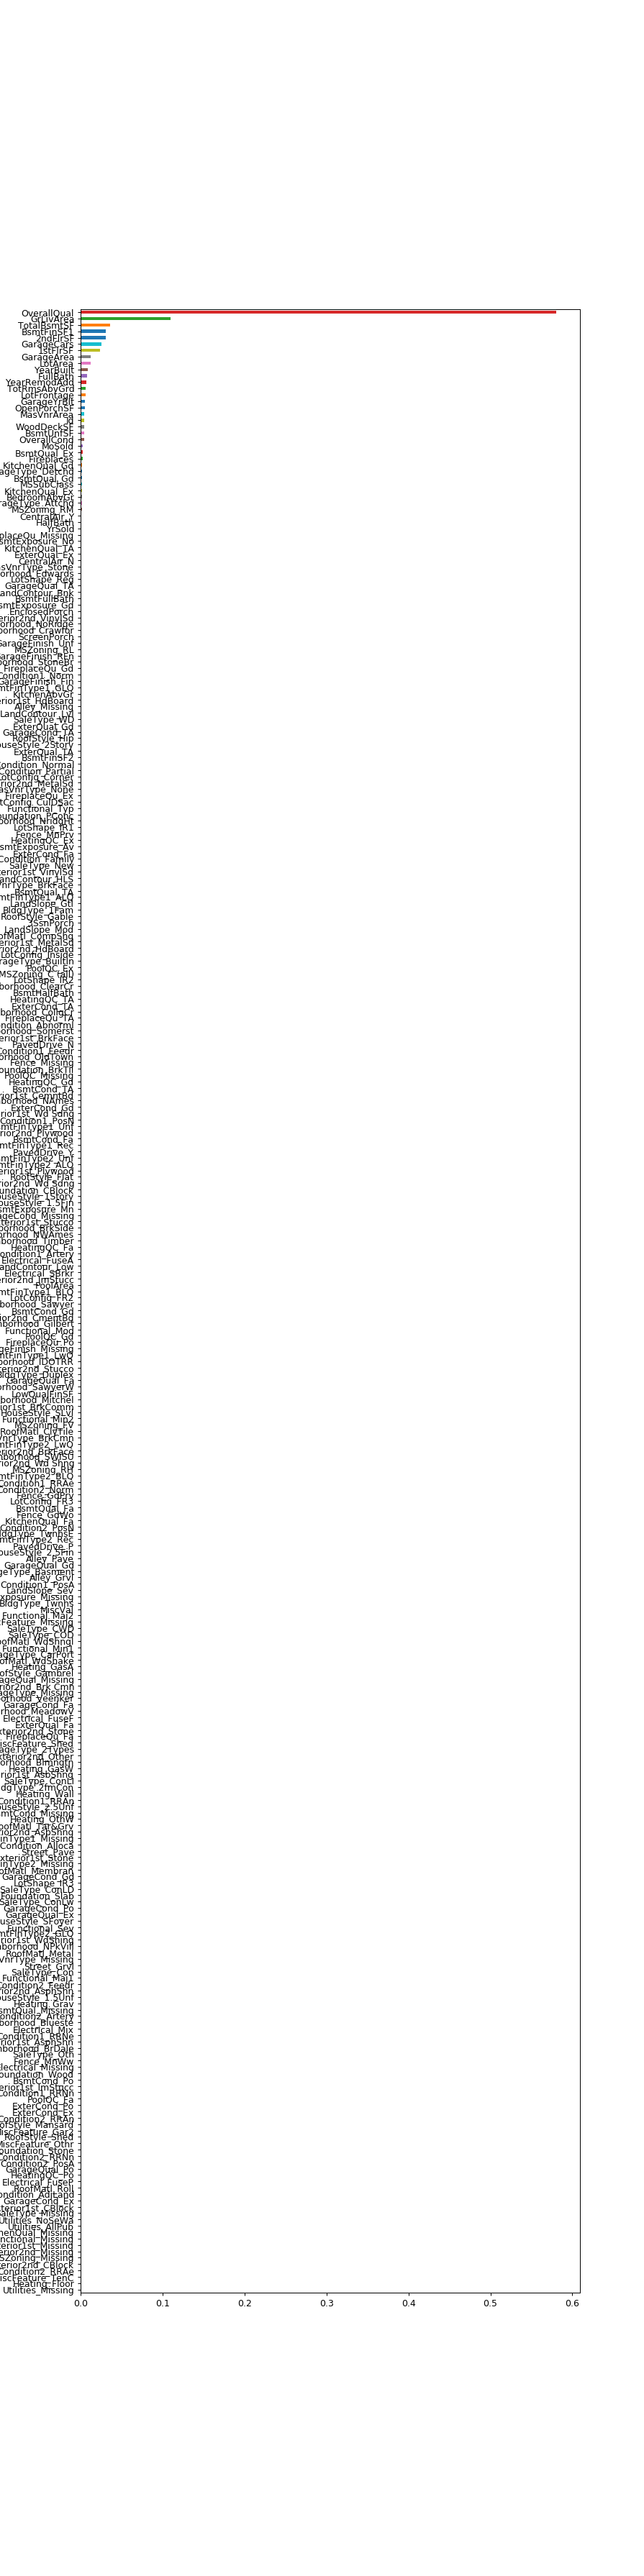

In [461]:
# plot the sorted variable importances

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.sort_values(inplace=True)

plt.figure(figsize=[10,40])
feature_importances.plot(kind = 'barh');

### Far too many features (columns)!

### (remember we split categorical columns into one-hot "dummies")  

### Let's merge those dummy columns to get the original columns

In [462]:
# function from tutorial (see link at top) to re-aggregate categorical dummy columns 
# when showing feature importances

def graph_dummy_feature_importances(model, 
                              feature_names, 
                              autoscale = True, 
                              headroom = 0.05, 
                              width = 10, 
                              summarized_columns = None):
    '''
    function to re-aggregate dummy variables from pd.get_dummies()
    
    and plot feature importances
    
    author: Mike Bernico
    '''

    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1

    feature_dict = dict(zip(feature_names, model.feature_importances_))

    if summarized_columns:

        for col_name in summarized_columns:

            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)

            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]

            for i in keys_to_remove:

                feature_dict.pop(i)

            feature_dict[col_name] = sum_value

    results = pd.Series(feature_dict)#, index=feature_dict.keys())

    results.sort_values(inplace=True)

    #    results.sort_values()
    plt.figure()
    results.plot(kind = 'barh', figsize = (width, len(results)/4), xlim = (0, x_scale));

<IPython.core.display.Javascript object>


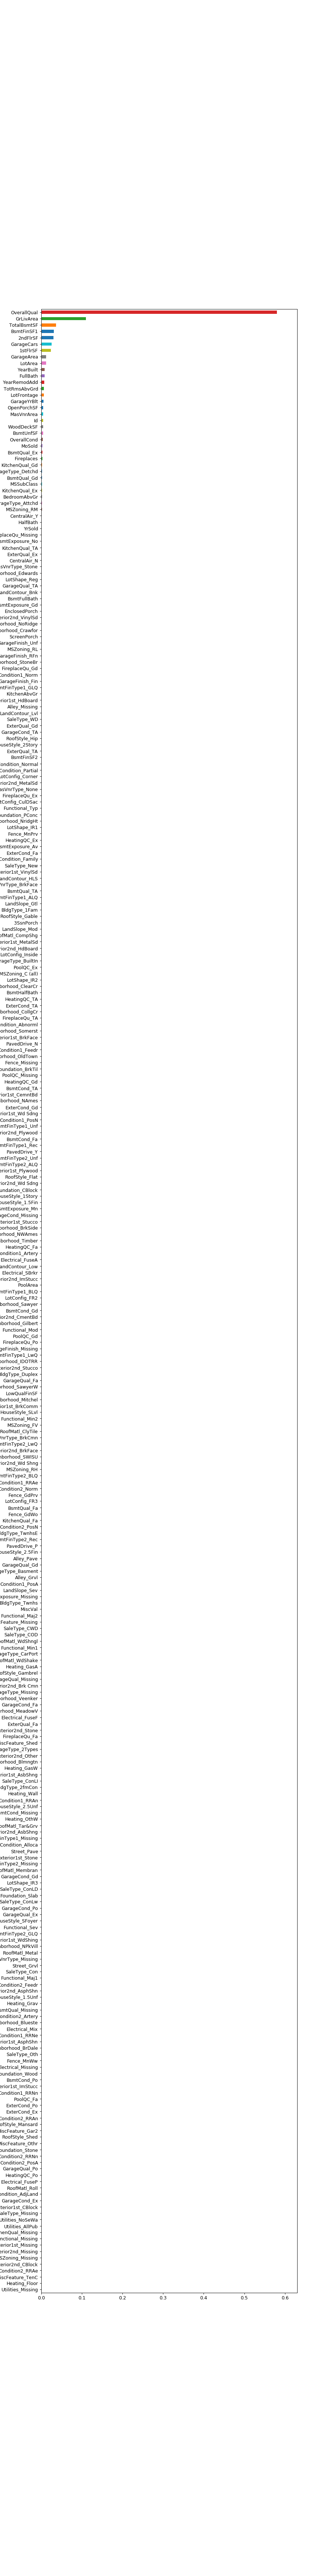

In [463]:
graph_dummy_feature_importances(model, 
                                X.columns, 
                                summarized_columns=categorical_variables)

# Parameter Tests

## Parameters that will make your model better

* n_estimators: number of trees in forest (choose as high as your computer can handle)
* max_features: number of features to consider when looking for best split: auto, None, sqrt, log2, 0.9, and 0.2
* min_samples_leaf:  The min number of samples in newly created leaves

## Parameters that will make your model easier to train

* n_jobs: number of processors used to test and train model.  **always set this to -1**

## n_jobs

In [317]:
%%timeit

model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)

The slowest run took 6.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.48 µs per loop


In [318]:
%%timeit

model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)

The slowest run took 6.82 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.43 µs per loop


## n_estimators

In [319]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    
    model = RandomForestRegressor(n_estimators = trees, 
                                  oob_score=True, 
                                  n_jobs = -1, 
                                  random_state=42)

    model.fit(X, y)

    score = model.oob_score_

    
    print (trees, "Trees")
    
    print("score: ", score)
    results.append(score)
    print()

30 Trees
score:  0.841436567043

50 Trees
score:  0.850776069986

100 Trees
score:  0.854263040342

200 Trees
score:  0.857460842736

500 Trees
score:  0.863037377283

1000 Trees
score:  0.861712931231

2000 Trees
score:  0.862303557664



<IPython.core.display.Javascript object>


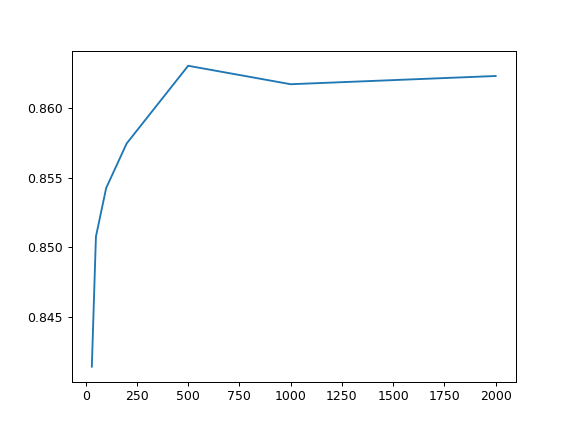

In [320]:
plt.figure()
pd.Series(results, n_estimator_options).plot();

## max_features

### For classification, use all of the features
### For regression, use the sqrt of the number of features

In [321]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=500, 
                                  oob_score = True, 
                                  n_jobs = -1, 
                                  random_state=42, 
                                  max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    score = model.oob_score_
    print("score: ", score)
    results.append(score)
    print()

auto option
score:  0.863037377283

None option
score:  0.863037377283

sqrt option
score:  0.848492877963

log2 option
score:  0.836524861157

0.9 option
score:  0.865404666156

0.2 option
score:  0.867428443264



<IPython.core.display.Javascript object>


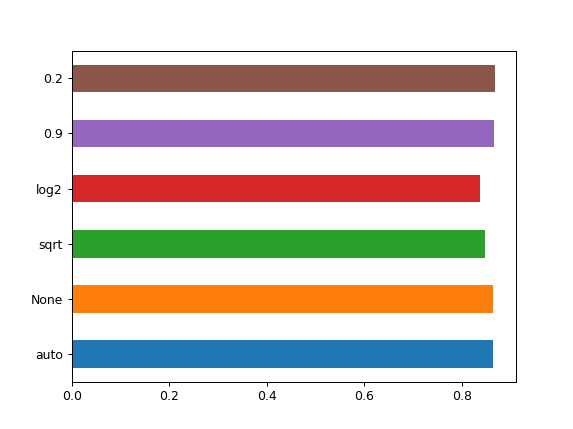

In [322]:
plt.figure()
pd.Series(results, max_features_options).plot(kind = "barh");

### highest value was at .2, so let's check numeric values

In [323]:
import numpy as np

results = []
max_features_options = list(np.arange(.1, 1.0, .1))

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=500, 
                                  oob_score = True, 
                                  n_jobs = -1, 
                                  random_state=42, 
                                  max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    score = model.oob_score_
    print("score: ", score)
    results.append(score)
    print()

0.1 option
score:  0.863101490601

0.2 option
score:  0.867428443264

0.3 option
score:  0.869743563273

0.4 option
score:  0.87112639514

0.5 option
score:  0.869365362813

0.6 option
score:  0.870862706884

0.7 option
score:  0.867349826669

0.8 option
score:  0.867232228866

0.9 option
score:  0.865404666156



<IPython.core.display.Javascript object>


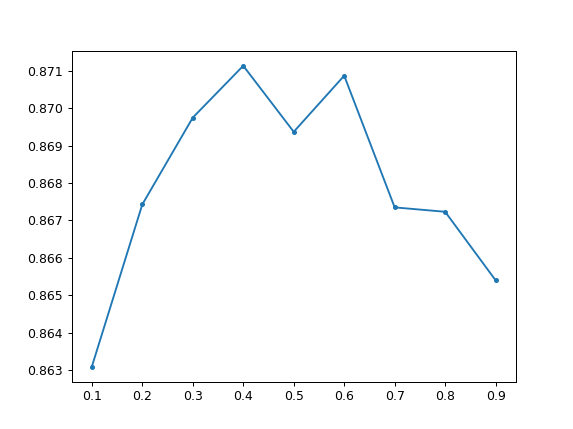

In [324]:
plt.figure()
pd.Series(results, max_features_options).plot(marker = ".");

## min_samples_leaf

In [325]:
results = []
min_samples_leaf_options = list(range(1,11))

for min_samples in min_samples_leaf_options:
        model = RandomForestRegressor(n_estimators=500, 
                                      oob_score = True, 
                                      n_jobs = -1, 
                                      random_state=42, 
                                      max_features = .4,
                                      min_samples_leaf = min_samples)
        
        model.fit(X, y)
        print (min_samples, "min samples")
        score = model.oob_score_
        print("score: ", score)
        results.append(score)
        print()

1 min samples
score:  0.87112639514

2 min samples
score:  0.868006741284

3 min samples
score:  0.86421806674

4 min samples
score:  0.861062536769

5 min samples
score:  0.858232822909

6 min samples
score:  0.856600082782

7 min samples
score:  0.853883418499

8 min samples
score:  0.853183907387

9 min samples
score:  0.850971770977

10 min samples
score:  0.848471740357



<IPython.core.display.Javascript object>


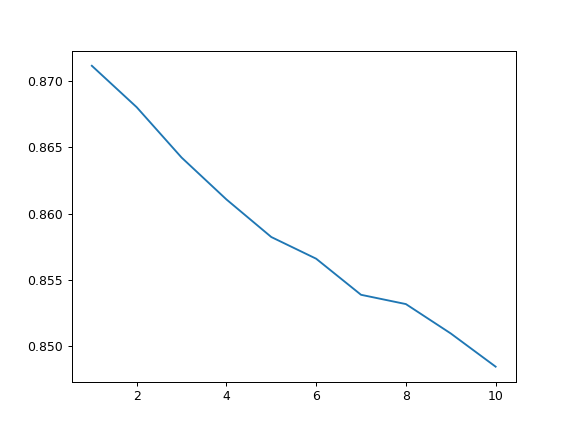

In [326]:
plt.figure()
pd.Series(results, min_samples_leaf_options).plot();

# Final Model

In [439]:
model = RandomForestRegressor(n_estimators=500, 
                              oob_score = True, 
                              n_jobs = -1, 
                              random_state=42, 
                              max_features = .4,
                              min_samples_leaf = 1)
        
model.fit(X, y)
score = model.oob_score_
print("score: ", score)

score:  0.86919555477


# Now use final trained model to do prediction on test data

In [440]:
# we performed some pre-processing on X_test above, 
# creating one-hot columns for each value of the categorical columns

X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [441]:
X_test.isna().any()

Id                       False
MSSubClass               False
LotFrontage               True
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea                True
BsmtFinSF1                True
BsmtFinSF2                True
BsmtUnfSF                 True
TotalBsmtSF               True
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath              True
BsmtHalfBath              True
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt               True
GarageCars                True
GarageArea                True
WoodDeckSF               False
OpenPorchSF              False
                         ...  
PoolQC_Ex                False
PoolQC_F

In [442]:
# use mean values to fill in Nans in numeric values

# the test data has more columns with Nan

X_test.LotFrontage.fillna(X_test.LotFrontage.mean(), inplace=True)
X_test.MasVnrArea.fillna(X_test.MasVnrArea.mean(), inplace=True)
X_test.GarageYrBlt.fillna(X_test.GarageYrBlt.mean(), inplace=True)
X_test.BsmtFinSF1.fillna(X_test.BsmtFinSF1.mean(), inplace=True)
X_test.BsmtFinSF2.fillna(X_test.BsmtFinSF2.mean(), inplace=True)
X_test.BsmtUnfSF.fillna(X_test.BsmtUnfSF.mean(), inplace=True)
X_test.TotalBsmtSF.fillna(X_test.TotalBsmtSF.mean(), inplace=True)
X_test.BsmtFullBath.fillna(X_test.BsmtFullBath.mean(), inplace=True)
X_test.BsmtHalfBath.fillna(X_test.BsmtHalfBath.mean(), inplace=True)
X_test.GarageCars.fillna(X_test.GarageCars.mean(), inplace=True)
X_test.GarageArea.fillna(X_test.GarageArea.mean(), inplace=True)

X_test[numeric_variables].isna().any()

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [443]:
# fix missing values in categorical variables

categorical_df = select_categorical_columns(X_test)
categorical_variables = list(categorical_df.columns)

for variable in categorical_variables:
    
    # replace Nan with "Missing" string
    X_test[variable].fillna("Missing", inplace = True)
    
    # split categorical values into one-hot columns
    dummies = pd.get_dummies(X_test[variable], prefix = variable)
    
    # adjoin new columns to original dataframe
    X_test = pd.concat([X_test, dummies], axis = 1)
    
    # finally, remove the original categorical columns that 
    # have been used to create new one-hot columns
    X_test.drop([variable], axis = 1, inplace = True)

In [444]:
# count all Nan values in data

X_test.isna().any().sum()

0

In [446]:
y_pred = model.predict(X_test)

In [448]:
X_test['SalePrice'] = y_pred

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [449]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1461,20,80.000000,11622,5,6,1961,1961,0.0,468.0,...,0,0,1,0,0,0,0,1,0,127676.682
1,1462,20,81.000000,14267,6,6,1958,1958,108.0,923.0,...,0,0,1,0,0,0,0,1,0,152973.950
2,1463,60,74.000000,13830,5,5,1997,1998,0.0,791.0,...,0,0,1,0,0,0,0,1,0,179095.464
3,1464,60,78.000000,9978,6,6,1998,1998,20.0,602.0,...,0,0,1,0,0,0,0,1,0,184058.612
4,1465,120,43.000000,5005,8,5,1992,1992,0.0,263.0,...,0,0,1,0,0,0,0,1,0,196561.966
5,1466,60,75.000000,10000,6,5,1993,1994,0.0,0.0,...,0,0,1,0,0,0,0,1,0,184155.652
6,1467,20,68.580357,7980,6,7,1992,2007,0.0,935.0,...,0,0,1,0,0,0,0,1,0,171962.924
7,1468,60,63.000000,8402,6,5,1998,1998,0.0,0.0,...,0,0,1,0,0,0,0,1,0,176551.358
8,1469,20,85.000000,10176,7,5,1990,1990,0.0,637.0,...,0,0,1,0,0,0,0,1,0,178477.288
9,1470,20,70.000000,8400,4,5,1970,1970,0.0,804.0,...,0,0,1,0,0,0,0,1,0,124940.598


In [455]:
X_test[["Id", "SalePrice"]].to_csv('predictions.csv', index = False)

In [453]:
?X_test.to_csv